In [121]:
from itertools import accumulate
import matplotlib.pyplot as plt
from math import log,sqrt
from scipy.stats import norm
from statistics import mean,variance

In [34]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))
        

In [170]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        result = self.sumstats.SX[j+1] - self.sumstats.SX[i]
        result *= result
        result /= (j - i + 1)
        result = -result
        result += self.sumstats.SXX[j+1] - self.sumstats.SXX[i]
        return result

In [171]:
class state :
    def __init__(self,X,cost,beta) :
        self.n = len(X) 
        self.cost = cost(X)
        self.beta = beta
        self.F = [-beta]
        self.cpts = []
        self.C = []

In [227]:
def op(S) :
    i,j = len(S.C),len(S.F)-1
    S.C = [S.cost(i,j+1) for i in range(i+1)]
    p_cost = [f+c+S.beta for f,c in zip(S.F,S.C)]
    min_p_cost = min(p_cost)
    S.F.append(min_p_cost)
    S.cpts.append(len(S.F) - p_cost.index(min_p_cost) - 1)
    return S

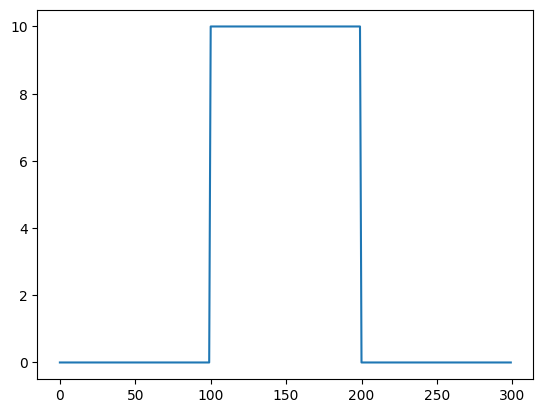

In [199]:
Z = [0 for i in range(100)] + [10 for i in range(100)]  + [0 for i in range(100)]
plt.plot(Z)
plt.show()

In [200]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S = op(S)
print(S.cpts)
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 

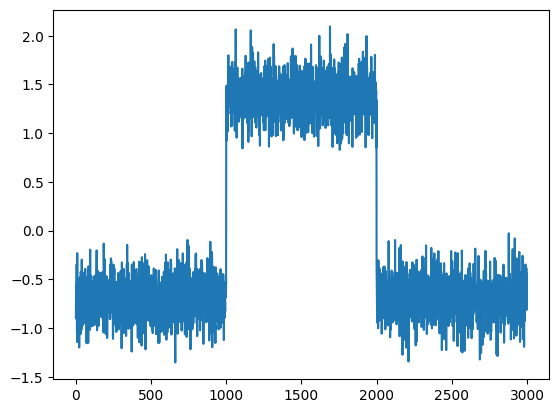

In [201]:
X = [0 for i in range(1000)] + [10 for i in range(1000)] + [0 for i in range(1000)]
E = norm.rvs(size=3000)
Z = [x+e for x,e in zip(X,E)]
mu = mean(Z)
sigma = sqrt(variance(Z))
Z = [(z-mu)/sigma for z in Z]
plt.plot(Z)
plt.show()

In [202]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S = op(S)
print(S.cpts)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [207]:
len(S.cpts)

2999

In [216]:
2999-999-1

1999

In [226]:
1999 - S.cpts[1999+1]

998

In [214]:
2999 - S.cpts[2999-999] -1

1997